In [16]:
import MySQLdb
conn = MySQLdb.connect(host='127.0.0.1', port=3306, user='root', passwd='123', db='edm', charset='utf8')
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pandas.io.sql as sql
import matplotlib.pyplot as plt

In [44]:
data = pd.read_excel('C:\\Users\\X1\\Desktop\\clustering.xlsx')

In [18]:
data.shape

(225, 7)

In [19]:
data.head()

,skill_point,importance,question_number,appearance_frequency,error_frequency,time,score
0,169,X,72,238,33,27.883333,15
1,170,X,115,238,39,20.283333,15
2,171,Y,77,238,57,22.683333,15
3,172,X,137,216,31,8.266667,13
4,184,X,49,72,8,3.666667,15


In [20]:
from sklearn.cluster import KMeans

In [25]:
data1 = data.iloc[:, 2:]

Text(0,0.5,'Distortion')

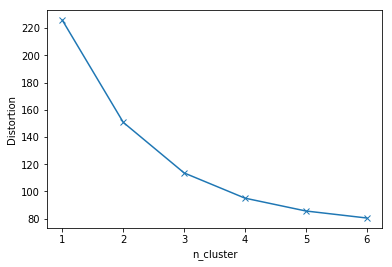

In [26]:
from scipy.spatial.distance import cdist
K=range(1,7)
meandistortions=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data1)
    meandistortions.append(sum(np.min(cdist(data1,kmeans.cluster_centers_, 'euclidean'),axis=1))/data1.shape[0])
plt.plot(K,meandistortions,'x-')
plt.xlabel('n_cluster')
plt.xticks(np.arange(1,7,1))
plt.ylabel('Distortion')

### 没有特别明显的拐点，考虑聚3类

In [27]:
from mpl_toolkits.mplot3d import Axes3D

In [28]:
data.head()

,skill_point,importance,question_number,appearance_frequency,error_frequency,time,score
0,169,X,72,238,33,27.883333,15
1,170,X,115,238,39,20.283333,15
2,171,Y,77,238,57,22.683333,15
3,172,X,137,216,31,8.266667,13
4,184,X,49,72,8,3.666667,15


### 用time和question_number聚类

In [29]:
from sklearn import preprocessing

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 11 Text yticklabel objects>)

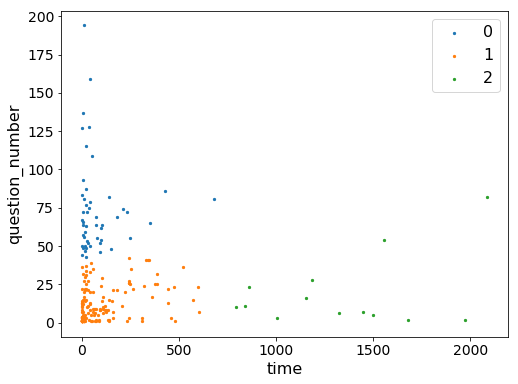

In [49]:
data4 = data.loc[:,['skill_point','time','question_number']]#

myModel = KMeans(n_clusters=3)
data_to_cluster=preprocessing.scale(data4.loc[:,['time','question_number']])
myModel.fit(data_to_cluster)#
label_pred = myModel.labels_
centroids = myModel.cluster_centers_

data4['label'] = label_pred#

data4_1 = data4[data4['label']==1]
data4_2 = data4[data4['label']==2]
data4_0 = data4[data4['label']==0]

list4 = [data4_0,data4_1, data4_2]

plt.figure(figsize=(8,6))
for result in list4:
    plt.scatter(result['time'], result['question_number'],s=5)

legend_list=['0','1', '2']
plt.legend(legend_list, fontsize=16)
plt.xlabel('time',fontsize=16 )
plt.ylabel('question_number',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)



In [50]:
a = []
for result in list4:
    a.append(result.mean())
t = pd.DataFrame(a)
t.to_csv(r'C:\Users\X1\Desktop\supply.csv')

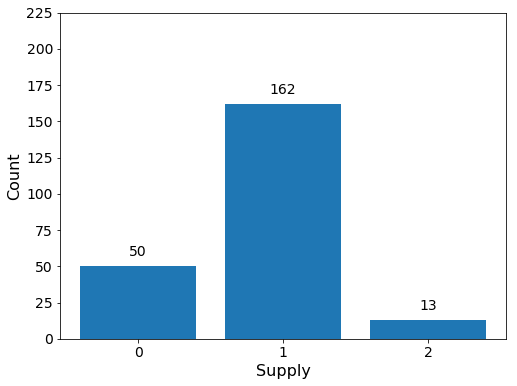

In [51]:
data['supply']=-1
for ei in data4.index:
    skill=data4.loc[ei,'skill_point']
    i = data[data['skill_point']==skill].index
    #data4 ei == data i
    if data4.loc[ei,'label']==0:
        data.iloc[i, -1]=0
    if data4.loc[ei,'label']==1:
        data.iloc[i, -1]=1
    if data4.loc[ei,'label']==2:
        data.iloc[i, -1]=2

temp = data['supply'].value_counts(ascending=True)
plt.figure(figsize=(8,6))
x=temp.index
y=temp
plt.bar(x,y)
plt.xticks(x, fontsize=14)
plt.yticks(np.arange(0,250,25), fontsize=14)
plt.xlabel('Supply', fontsize=16)
plt.ylabel('Count', fontsize=16)

for a,b in zip(x,temp):
    plt.text(a, b+5, '%.0f' % b, ha='center', va='bottom',fontsize=14)



In [52]:
data.head()

,skill_point,importance,question_number,appearance_frequency,error_frequency,time,score,supply
0,169,X,72,238,33,27.883333,15,0
1,170,X,115,238,39,20.283333,15,0
2,171,Y,77,238,57,22.683333,15,0
3,172,X,137,216,31,8.266667,13,0
4,184,X,49,72,8,3.666667,15,0


In [53]:
data['supply'].value_counts()

1    162
0     50
2     13
Name: supply, dtype: int64

## 用time和error聚类

skill_point        13992.615819
time                  84.264878
error_frequency       10.169492
label                  0.000000
dtype: float64 



skill_point        11524.675676
time                 176.666216
error_frequency       47.837838
label                  1.000000
dtype: float64 



skill_point        15445.181818
time                1433.056061
error_frequency       18.454545
label                  2.000000
dtype: float64 





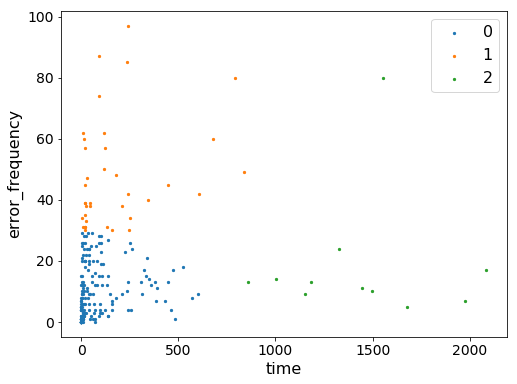

In [54]:
data4 = data.loc[:,['skill_point','time','error_frequency']]#

myModel = KMeans(n_clusters=3)
data_to_cluster=preprocessing.scale(data4.loc[:,['time','error_frequency']])
myModel.fit(data_to_cluster)#
label_pred = myModel.labels_
centroids = myModel.cluster_centers_

data4['label'] = label_pred#

data4_1 = data4[data4['label']==1]
data4_2 = data4[data4['label']==2]
data4_0 = data4[data4['label']==0]

list4 = [data4_0,data4_1, data4_2]

plt.figure(figsize=(8,6))
for result in list4:
    plt.scatter(result['time'], result['error_frequency'],s=5)

legend_list=['0','1', '2']
plt.legend(legend_list, fontsize=16)
plt.xlabel('time',fontsize=16 )
plt.ylabel('error_frequency',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for result in list4:
    print(result.mean(),'\n\n\n')

In [55]:
a = []
for result in list4:
    a.append(result.mean())
t = pd.DataFrame(a)
t.to_csv(r'C:\Users\X1\Desktop\study_feature.csv')

2     11
1     37
0    177
Name: study_feature, dtype: int64

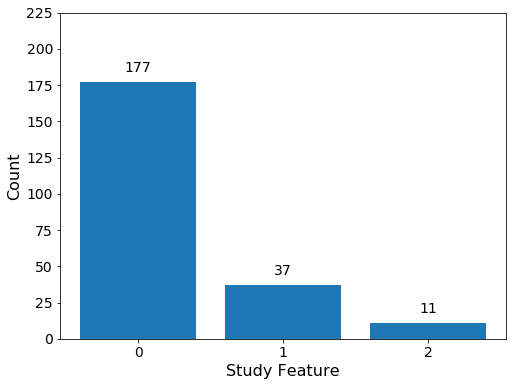

In [56]:
data['study_feature']=-1
for ei in data4.index:
    skill=data4.loc[ei,'skill_point']
    i = data[data['skill_point']==skill].index
    if data4.loc[ei,'label']==0:
        data.iloc[i, -1]=0
    if data4.loc[ei,'label']==1:
        data.iloc[i, -1]=1
    if data4.loc[ei,'label']==2:
        data.iloc[i, -1]=2

temp = data['study_feature'].value_counts(ascending=True)
plt.figure(figsize=(8,6))
x=temp.index
y=temp
plt.bar(x,y)
plt.xticks(x, fontsize=14)
plt.yticks(np.arange(0,250,25), fontsize=14)
plt.xlabel('Study Feature', fontsize=16)
plt.ylabel('Count', fontsize=16)

for a,b in zip(x,temp):
    plt.text(a, b+5, '%.0f' % b, ha='center', va='bottom',fontsize=14)

temp

In [42]:
data.head()

,skill_point,importance,question_number,appearance_frequency,error_frequency,time,score,supply,study_feature
0,169,X,72,238,33,27.883333,15,2,0
1,170,X,115,238,39,20.283333,15,2,0
2,171,Y,77,238,57,22.683333,15,2,0
3,172,X,137,216,31,8.266667,13,2,1
4,184,X,49,72,8,3.666667,15,2,1


In [43]:
data['study_feature'].value_counts()

1    184
0     30
2     11
Name: study_feature, dtype: int64

## error_frequency&score&time

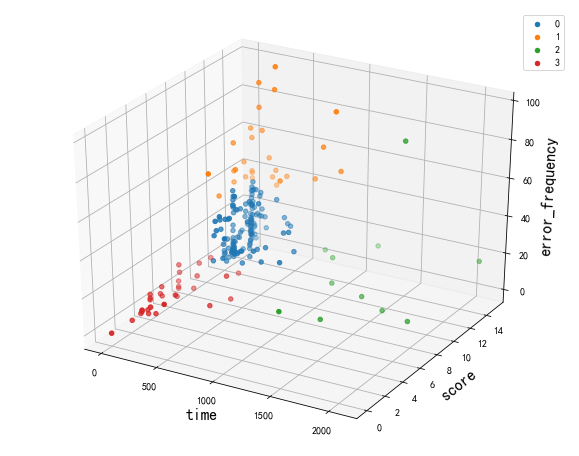

In [102]:
data4 = data.loc[:,['skill_point','score','error_frequency','time']]#

myModel = KMeans(n_clusters=4)
data_to_cluster=preprocessing.scale(data4.loc[:,['score','error_frequency','time']])
myModel.fit(data_to_cluster)#
label_pred = myModel.labels_
centroids = myModel.cluster_centers_

data4['label'] = label_pred#

data4_1 = data4[data4['label']==1]
data4_2 = data4[data4['label']==2]
data4_0 = data4[data4['label']==0]
data4_3 = data4[data4['label']==3]
list4 = [data4_0,data4_1, data4_2,data4_3]



#legend_list=['0','1', '2']
#plt.legend(legend_list, fontsize=16)

fig = plt.figure(figsize=(10,8))
plt.rcParams['font.sans-serif']=['SimHei']
ax = fig.add_subplot(1,1,1, projection='3d')
for result in list4:
    ax.scatter(result['time'],result['score'],result['error_frequency'] )
ax.set_ylabel('score',fontsize=16)  # 坐标轴
ax.set_zlabel('error_frequency',fontsize=16)
ax.set_xlabel('time',fontsize=16)
ax.legend([0,1,2,3])

2     11
1     28
3     34
0    152
Name: priority, dtype: int64

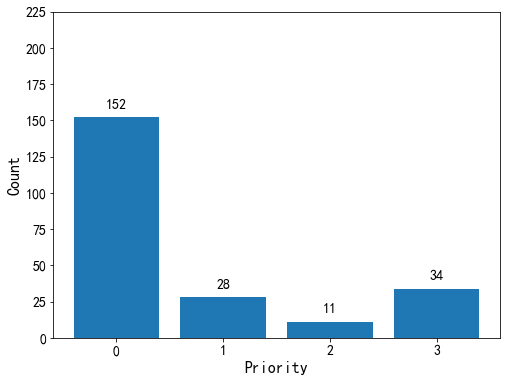

In [103]:
data['priority']=-1
for ei in data4.index:
    skill=data4.loc[ei,'skill_point']
    i = data[data['skill_point']==skill].index
    if data4.loc[ei,'label']==0:
        data.iloc[i, -1]=0
    if data4.loc[ei,'label']==1:
        data.iloc[i, -1]=1
    if data4.loc[ei,'label']==2:
        data.iloc[i, -1]=2
    if data4.loc[ei,'label']==3:
        data.iloc[i, -1]=3
temp = data['priority'].value_counts(ascending=True)
plt.figure(figsize=(8,6))
x=temp.index
y=temp
plt.bar(x,y)
plt.xticks(x, fontsize=14)
plt.yticks(np.arange(0,250,25), fontsize=14)
plt.xlabel('Priority', fontsize=16)
plt.ylabel('Count', fontsize=16)

for a,b in zip(x,temp):
    plt.text(a, b+5, '%.0f' % b, ha='center', va='bottom',fontsize=14)

temp

In [104]:
a = []
for result in list4:
    a.append(result.mean())
t = pd.DataFrame(a)
t.to_csv(r'C:\Users\X1\Desktop\priority.csv')

In [323]:
data4.head()

,skill_point,score,error_frequency,time,label
0,169,15,33,27.883333,0
1,170,15,39,20.283333,2
2,171,15,57,22.683333,2
3,172,13,31,8.266667,0
4,184,15,8,3.666667,0


In [105]:
data.head()

,skill_point,importance,question_number,appearance_frequency,error_frequency,time,score,supply,study_feature,priority
0,169,X,72,238,33,27.883333,15,0,1,0
1,170,X,115,238,39,20.283333,15,0,1,1
2,171,Y,77,238,57,22.683333,15,0,1,1
3,172,X,137,216,31,8.266667,13,0,1,0
4,184,X,49,72,8,3.666667,15,0,0,0


## 对所有数据的3个新参数进行绘图

Text(0.5,0,'supply')

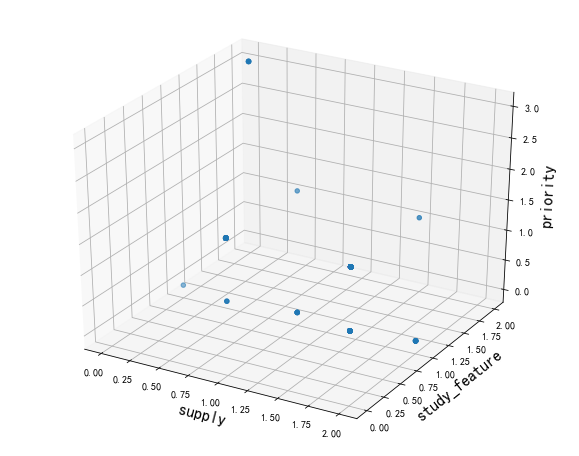

In [273]:
fig = plt.figure(figsize=(10,8))
plt.rcParams['font.sans-serif']=['SimHei']
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(data['supply'],data['study_feature'],data['priority'] )
ax.set_ylabel('study_feature',fontsize=16) 
ax.set_zlabel('priority',fontsize=16)
ax.set_xlabel('supply',fontsize=16)


## 总结：离散变量聚类效果不好，改进先前打标签方式

In [106]:
data.to_csv('C:\\Users\\X1\\Desktop\\skill_point_325.csv',encoding='utf-8')